# Required libraries/packages

In [25]:
!pip install torchvision==0.9.1 torch==1.8.1 
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
!pip install tqdm
from tqdm import tqdm

# Support functions

In [26]:
# Display a digit from the MNIST dataset
def display_digit(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('Class = ' + str(data_sample[1]))

# MNIST Dataset

In [27]:
# Training set
train_dataset = dsets.MNIST(root='./data', train=True, download=False, transform=transforms.ToTensor())

# Validation set
validation_dataset = dsets.MNIST(root='./data', download=False, transform=transforms.ToTensor())

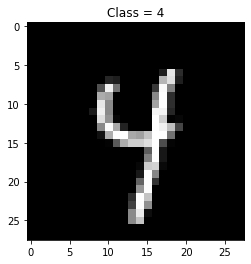

In [28]:
display_digit(train_dataset[26])

# Model creation

Sigmoid activation function

In [29]:
# Build the model with sigmoid function

class SigNet(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(SigNet, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x

Tanh activation function

In [30]:
# Build the model with Tanh function

class TanhNet(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(TanhNet, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = self.linear2(x)
        return x

ReLU activation function

In [31]:
# Build the model with Relu function

class ReluNet(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(ReluNet, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

# Training

In [32]:
# Define the function for training the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}  

    for epoch in tqdm(range(epochs)):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.item())

        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label=torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)

    return useful_stuff

In [33]:
# Set the dimensions
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

# Create the training data loader and validation data loader object
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

# Create the criterion function
criterion = nn.CrossEntropyLoss()

# Hyperparameters
learning_rate = 0.01
epochs = 30

# Sigmoid model
sigModel = SigNet(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(sigModel.parameters(), lr=learning_rate)
training_results = train(sigModel, criterion, train_loader, validation_loader, optimizer, epochs)

# Tanh model
tanhModel = TanhNet(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(tanhModel.parameters(), lr=learning_rate)
training_results_tanch = train(tanhModel, criterion, train_loader, validation_loader, optimizer, epochs)

# ReLU model
reluModel = ReluNet(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(reluModel.parameters(), lr=learning_rate)
training_results_relu = train(reluModel, criterion, train_loader, validation_loader, optimizer, epochs)

100%|██████████| 30/30 [04:15<00:00,  8.51s/it]


# Results

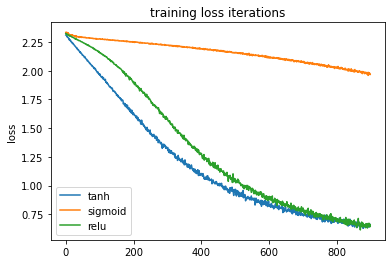

In [34]:
# Compare the training loss
plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()

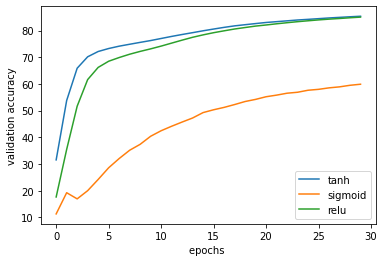

In [35]:
# Compare the validation loss
plt.plot(training_results_tanch['validation_accuracy'], label='tanh')
plt.plot(training_results['validation_accuracy'], label='sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label='relu') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')
plt.legend()
plt.show()

Random inference test:

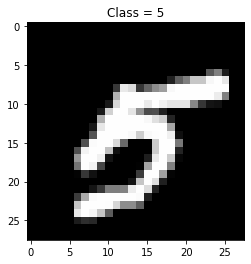

Sigmoid prediction: 7  ==>  Prediction incorrect!
Tanh prediction: 5  ==>  Prediction correct!
ReLU prediction: 5  ==>  Prediction correct!


In [45]:
# Take a random sample from the validation dataset
index = np.random.randint(0, len(validation_dataset))
sample = validation_dataset[index]
x = sample[0]
y = sample[1]

# Sigmoid model
z1 = sigModel(x.reshape(-1, 28 * 28))
_, yhat1 = torch.max(z1, 1)

# Tanh model
z2 = tanhModel(x.reshape(-1, 28 * 28))
_, yhat2 = torch.max(z2, 1)

# ReLU model
z3 = reluModel(x.reshape(-1, 28 * 28))
_, yhat3 = torch.max(z3, 1)

# Result
display_digit(sample)
plt.show()
text1 = "Prediction incorrect!"
text2 = "Prediction incorrect!"
text3 = "Prediction incorrect!"
if yhat1 == y:
  text1 = "Prediction correct!"
if yhat2 == y:
  text2 = "Prediction correct!"
if yhat3 == y:
  text3 = "Prediction correct!"
print("Sigmoid prediction:", yhat1.item(), " ==> ", text1)
print("Tanh prediction:", yhat2.item(), " ==> ", text2)
print("ReLU prediction:", yhat3.item(), " ==> ", text3)